In [1]:
# id:14--28--14 
import numpy as np
import pandas as pd
df=pd.read_csv("week 3.csv")
print(df.head())
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]

   # id:14--28--14   Unnamed: 1  Unnamed: 2
0             -0.65       -0.09   -1.101526
1             -0.34       -0.72    0.671409
2              0.80       -0.72   -0.348501
3              0.52        0.11   -0.871060
4             -0.01        0.16   -0.316258


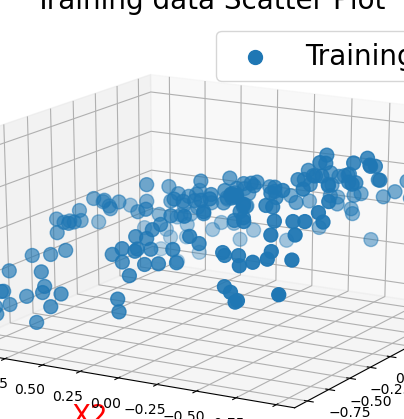

In [2]:
#i(a)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection ='3d') 
ax.scatter(X[:,0],X[:,1],y,label="Training Data",s=100) #Scatter Plot fot the Training Data.
ax.set_xlabel('X1',size='20',color='red')
ax.set_ylabel('X2',size='20',color='red')
ax.set_zlabel('Y',size='20',color='red')
plt.rcParams['figure.constrained_layout.use'] = True
plt.title("Training data Scatter Plot",fontsize=20)
ax.view_init(20,210)
ax.legend(fontsize=20)

In [5]:
#i(b&c)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5) #Taking Polynomial Features upto 5
X_poly=poly.fit_transform(X)
# Generate the [-1.1,1.1] grid for predictions since -5,5 makes the plot difficult to interpret
Xtest = []
grid = np.linspace(-1.1, 1.1)
for i in grid:
    for j in grid:
        Xtest.append([i, j])
# Grab the powers up to 5 for the grid data.
Xtest = np.array(Xtest)
Xtest_poly = poly.fit_transform(Xtest) 


C_Value: 0.1 Alpha_val:  10.0 Lasso Coefficients:  [ 0. -0. -0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0. -0. -0. -0.  0.
 -0.  0. -0.] Intercept:  -0.6331239314924624

R squared 0.0

C_Value: 1 Alpha_val:  1.0 Lasso Coefficients:  [ 0. -0. -0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0. -0. -0. -0.  0.
 -0.  0. -0.] Intercept:  -0.6331239314924624

R squared 0.0

C_Value: 10 Alpha_val:  0.1 Lasso Coefficients:  [ 0.         -0.         -0.72517176 -0.96503839 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.        ] Intercept:  -0.33621921416848144

R squared 0.7947125382773733

C_Value: 50 Alpha_val:  0.02 Lasso Coefficients:  [ 0.         -0.         -0.92377217 -1.76563578 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.        ] In

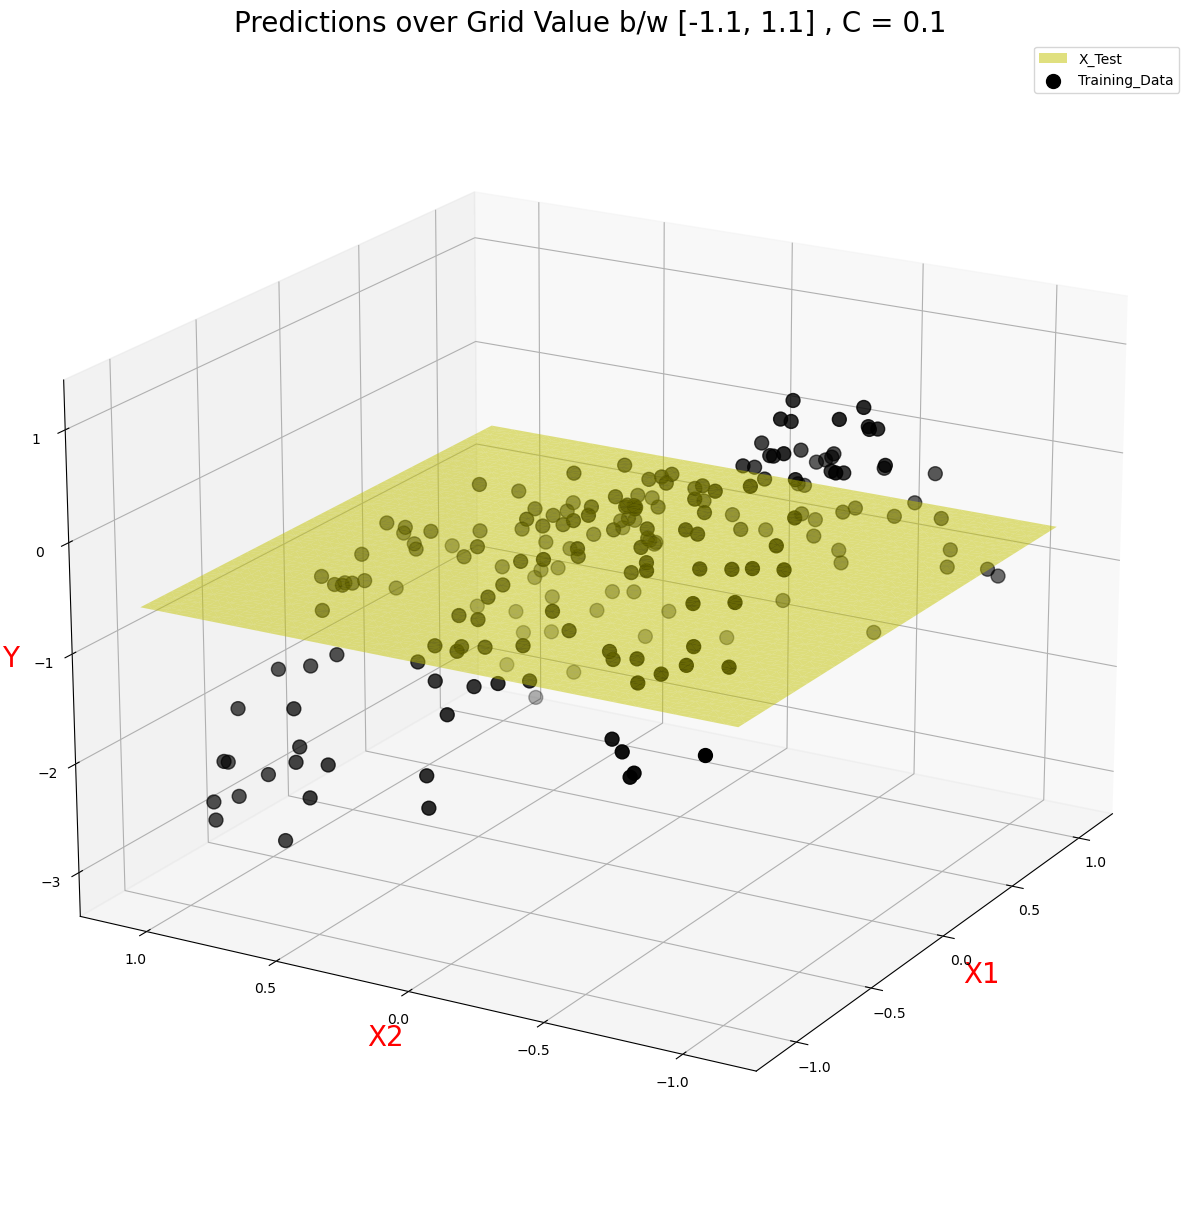

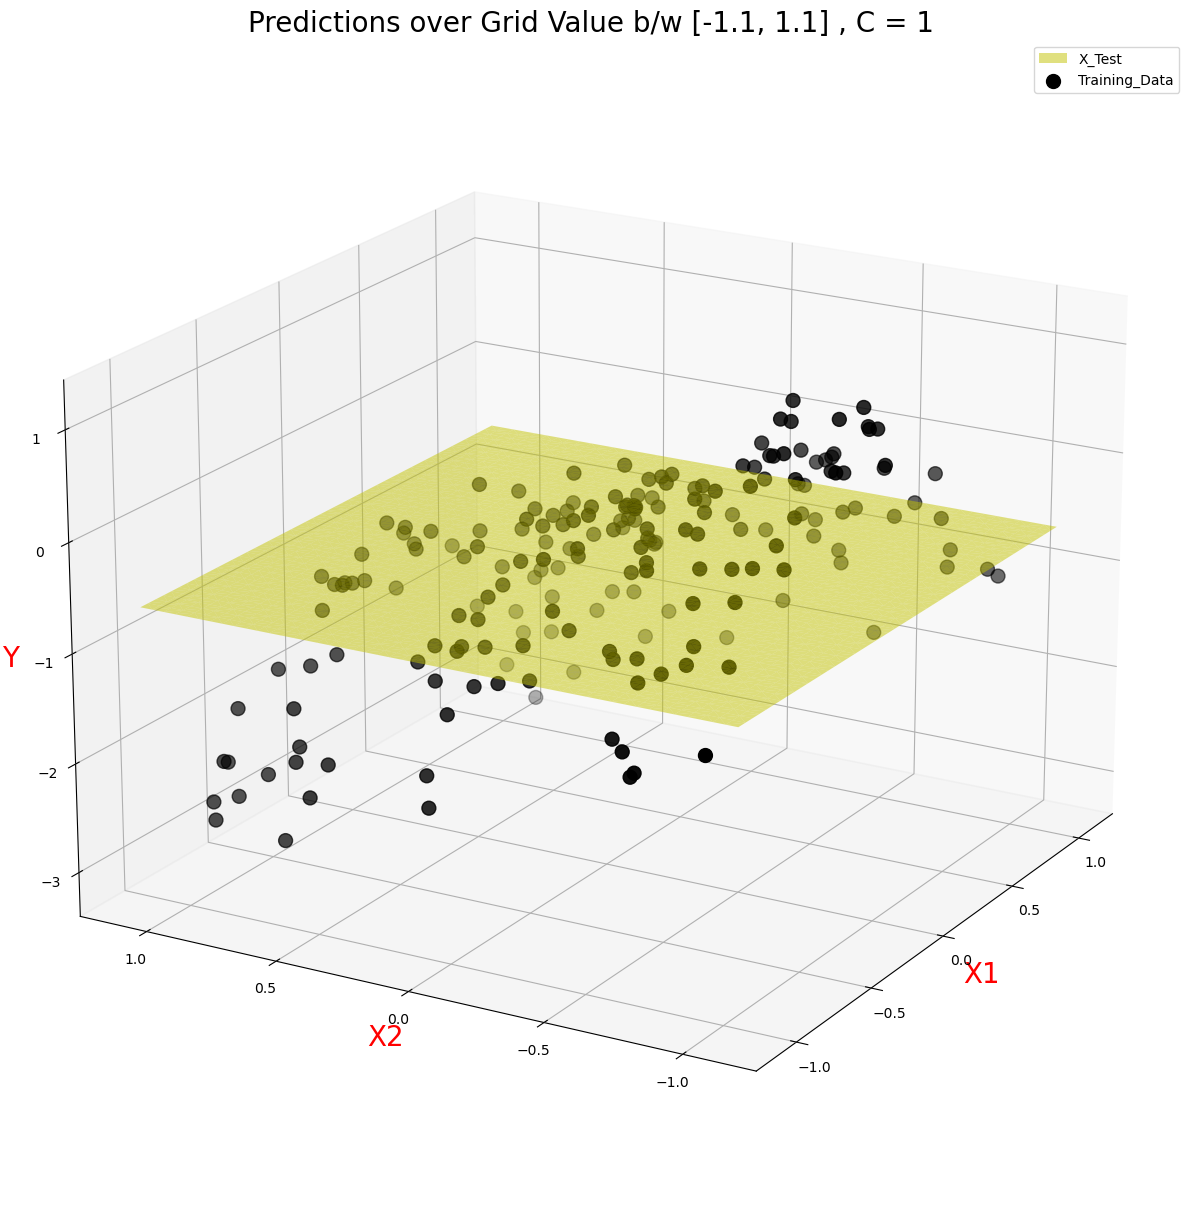

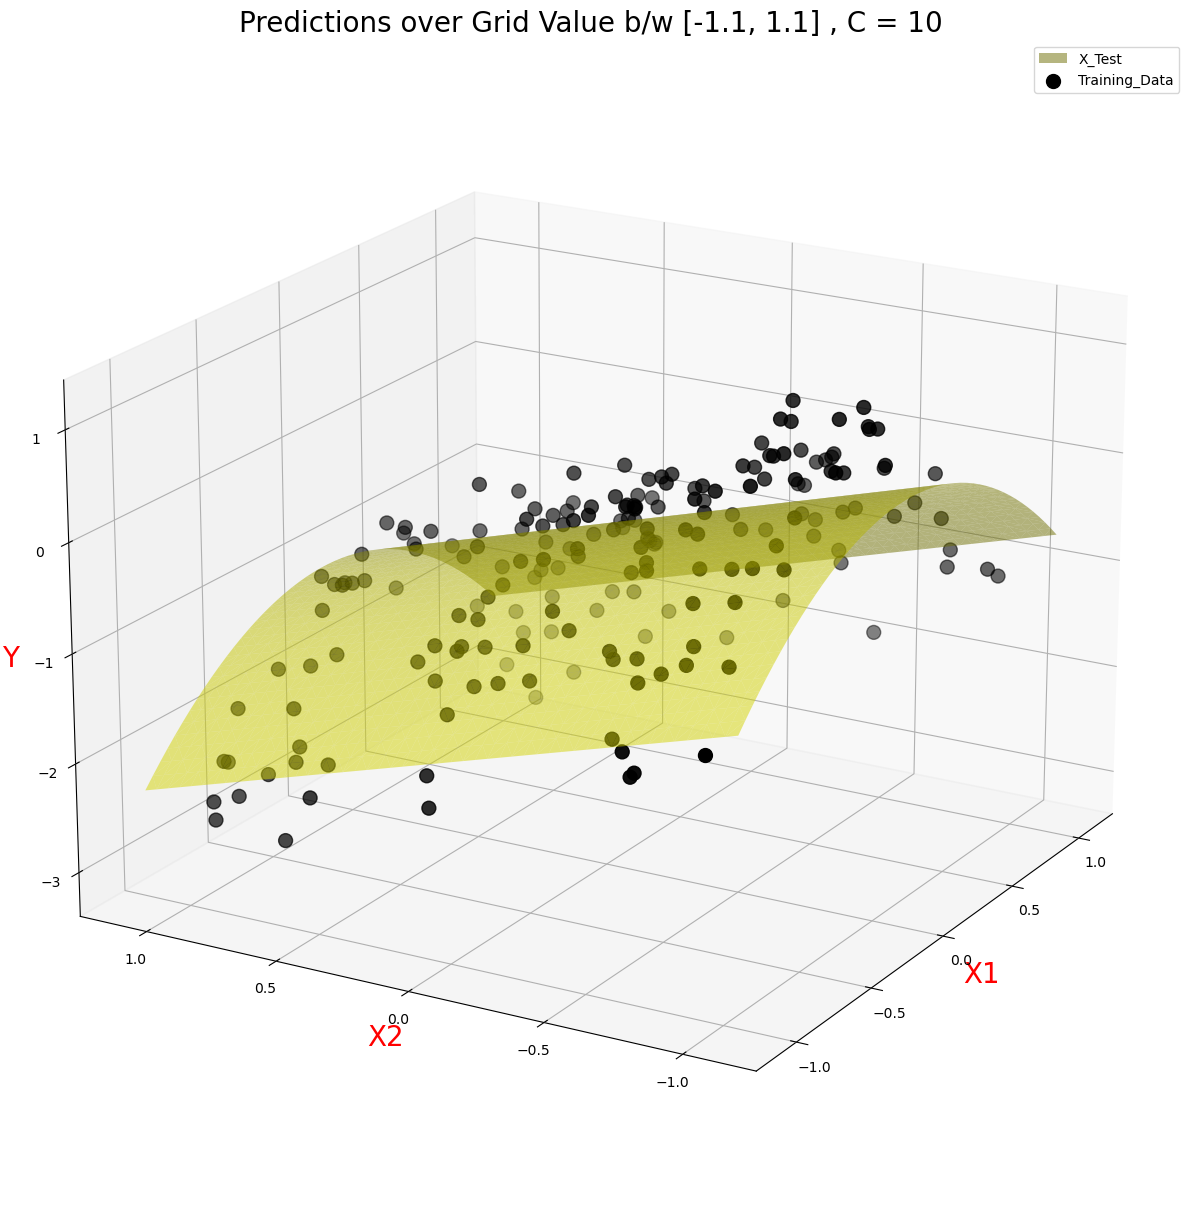

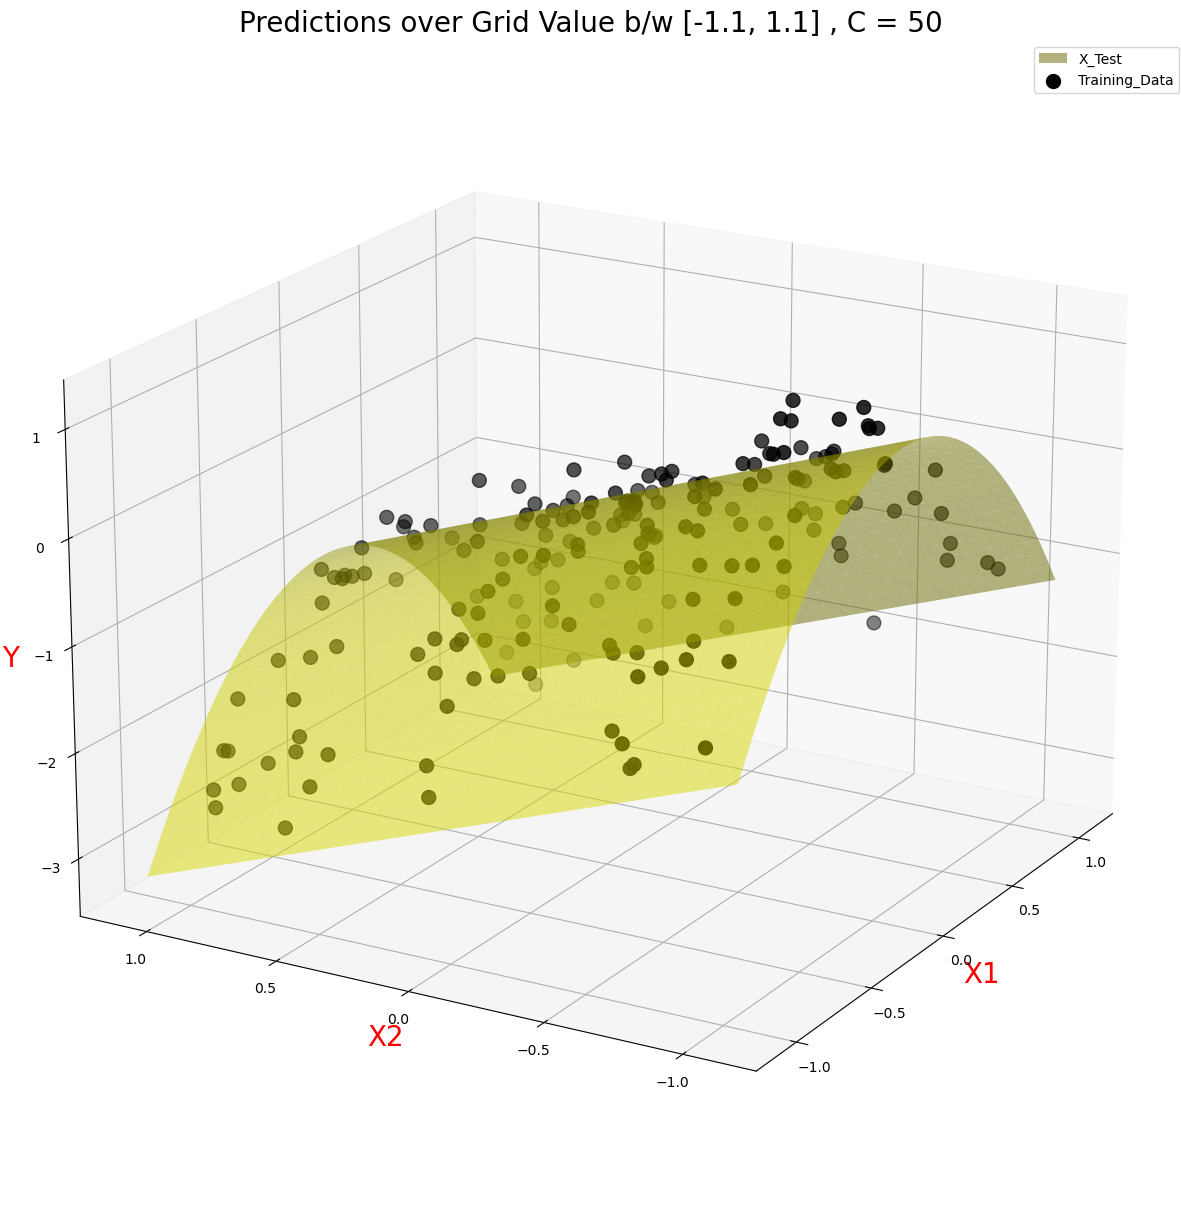

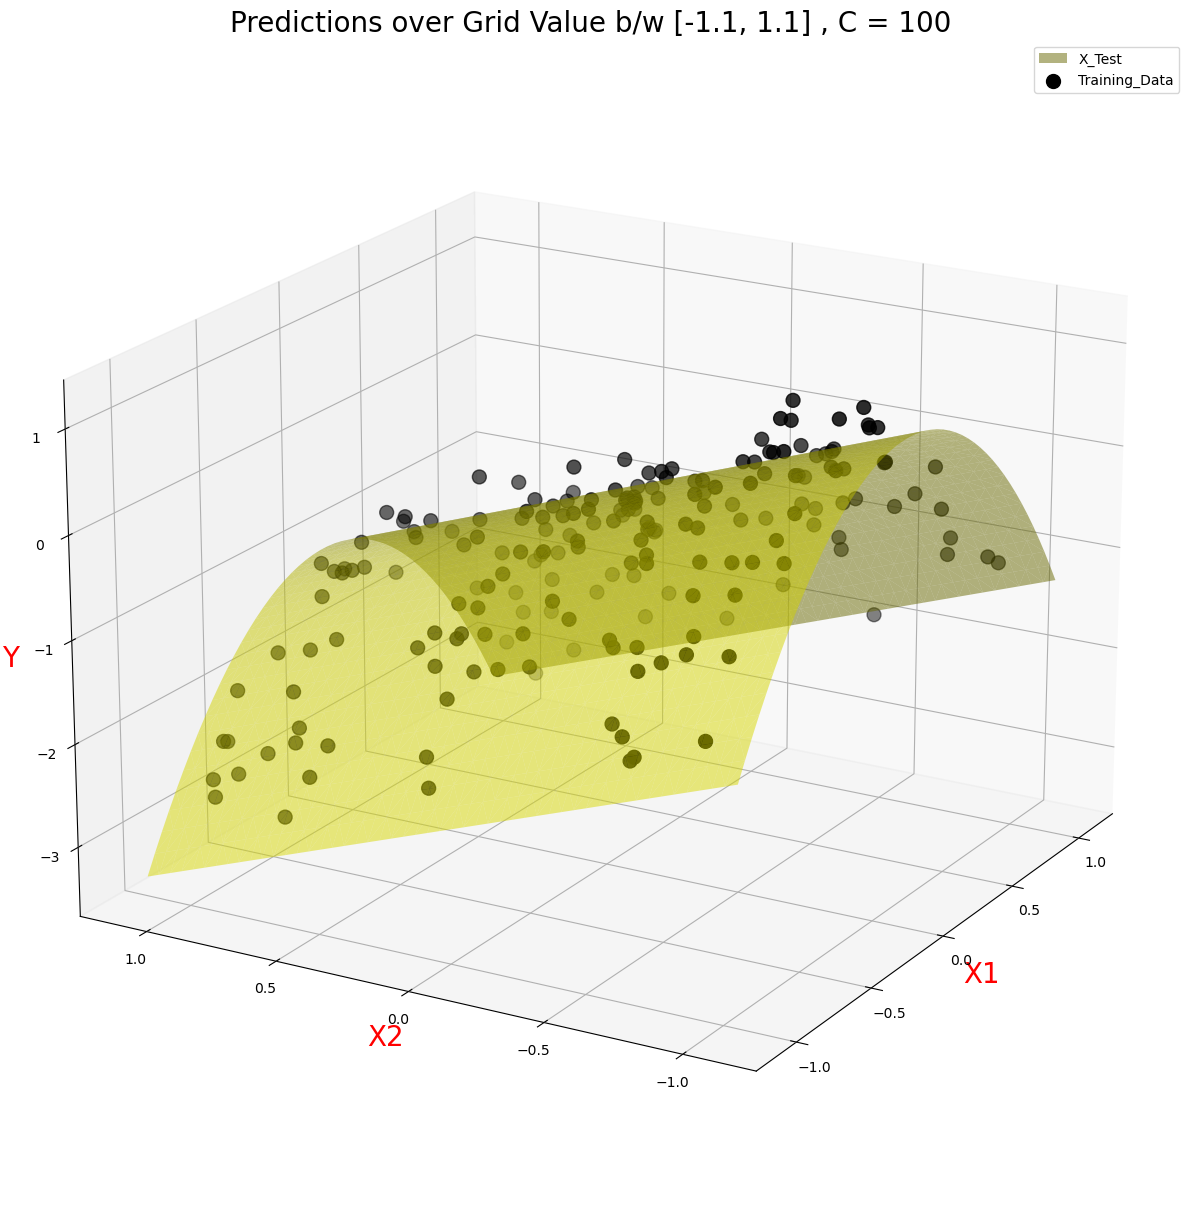

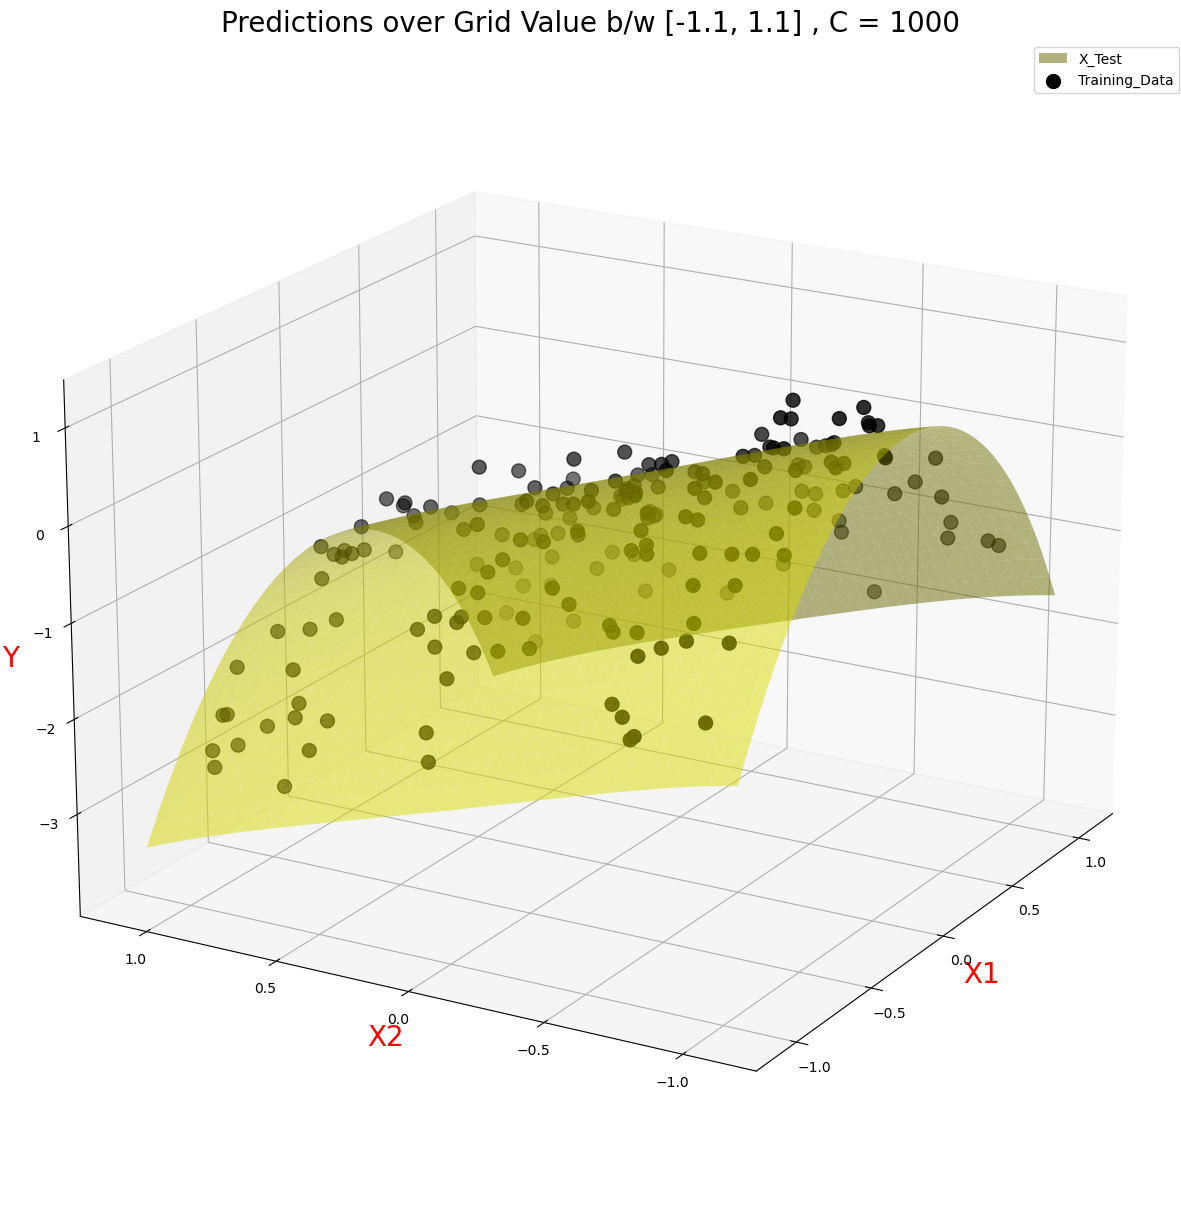

In [6]:
#i(b&c)
C=[0.1, 1, 10, 50, 100,1000]

for C_Value in C:
    alpha_val=1/(C_Value)
    linlasso=Lasso(alpha=alpha_val,max_iter=10000).fit(X_poly,y) #Training the Lasso Regression on the Poly features, with C in the above range
    print("C_Value:", C_Value,"Alpha_val: ",alpha_val,"Lasso Coefficients: ",linlasso.coef_,"Intercept: ",linlasso.intercept_)
    print()
    print("R squared", linlasso.score(X_poly,y))
    print()
    
    ypred=linlasso.predict(Xtest_poly)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.set_size_inches(12,12)
    ax1=ax.plot_trisurf(Xtest[:, 0], Xtest[:, 1], ypred, color="yellow", alpha=0.5,label='X_Test') #Plot for the test data
    ax.scatter(X[:, 0], X[:, 1], y,color='black',label="Training_Data",s=100) #Plot for training dta
    ax1._edgecolors2d = ax1._edgecolor3d
    ax1._facecolors2d = ax1._facecolor3d
    ax.set_xlabel('X1',size='20',color='red')
    ax.set_ylabel('X2',size='20',color='red')
    ax.set_zlabel('Y',size='20',color='red')
    ax.view_init(20,210)
    ax.legend()
    ax.set_title("Predictions over Grid Value b/w [-1.1, 1.1] , C = " + str(C_Value),fontsize=20)
    

C_Value: 0.0001 Alpha_val:  5000.0 Ridge Coefficients:  [ 0.00000000e+00 -6.88696781e-05 -1.40566797e-02 -8.03484631e-03
  4.22948486e-04 -1.67551473e-03 -7.79420010e-05 -5.16258256e-03
  2.43241489e-04 -8.53515032e-03 -6.94952219e-03  6.02973037e-05
 -3.94486831e-03  5.78073929e-04 -1.67909845e-03 -1.71034689e-04
 -3.50445284e-03  1.15307658e-04 -3.30598942e-03  3.10361239e-04
 -6.12314736e-03] Intercept:  -0.6278077803821528

R squared 0.03165749286518171

C_Value: 0.1 Alpha_val:  5.0 Ridge Coefficients:  [ 0.          0.00324933 -0.76159255 -0.99228497 -0.05173174  0.06119372
 -0.00126088 -0.05698634 -0.00850075 -0.21487046 -0.70462431  0.01752987
 -0.29437762  0.02235597 -0.01581767 -0.03765692 -0.00222661 -0.03145923
  0.04250154 -0.01347477 -0.0399763 ] Intercept:  -0.16407592227769224

R squared 0.9397535361278373

C_Value: 1 Alpha_val:  0.5 Ridge Coefficients:  [ 0.         -0.03189309 -0.92259176 -1.45153908 -0.1599442   0.21513022
  0.1187831   0.0290515   0.04323028 -0.22517

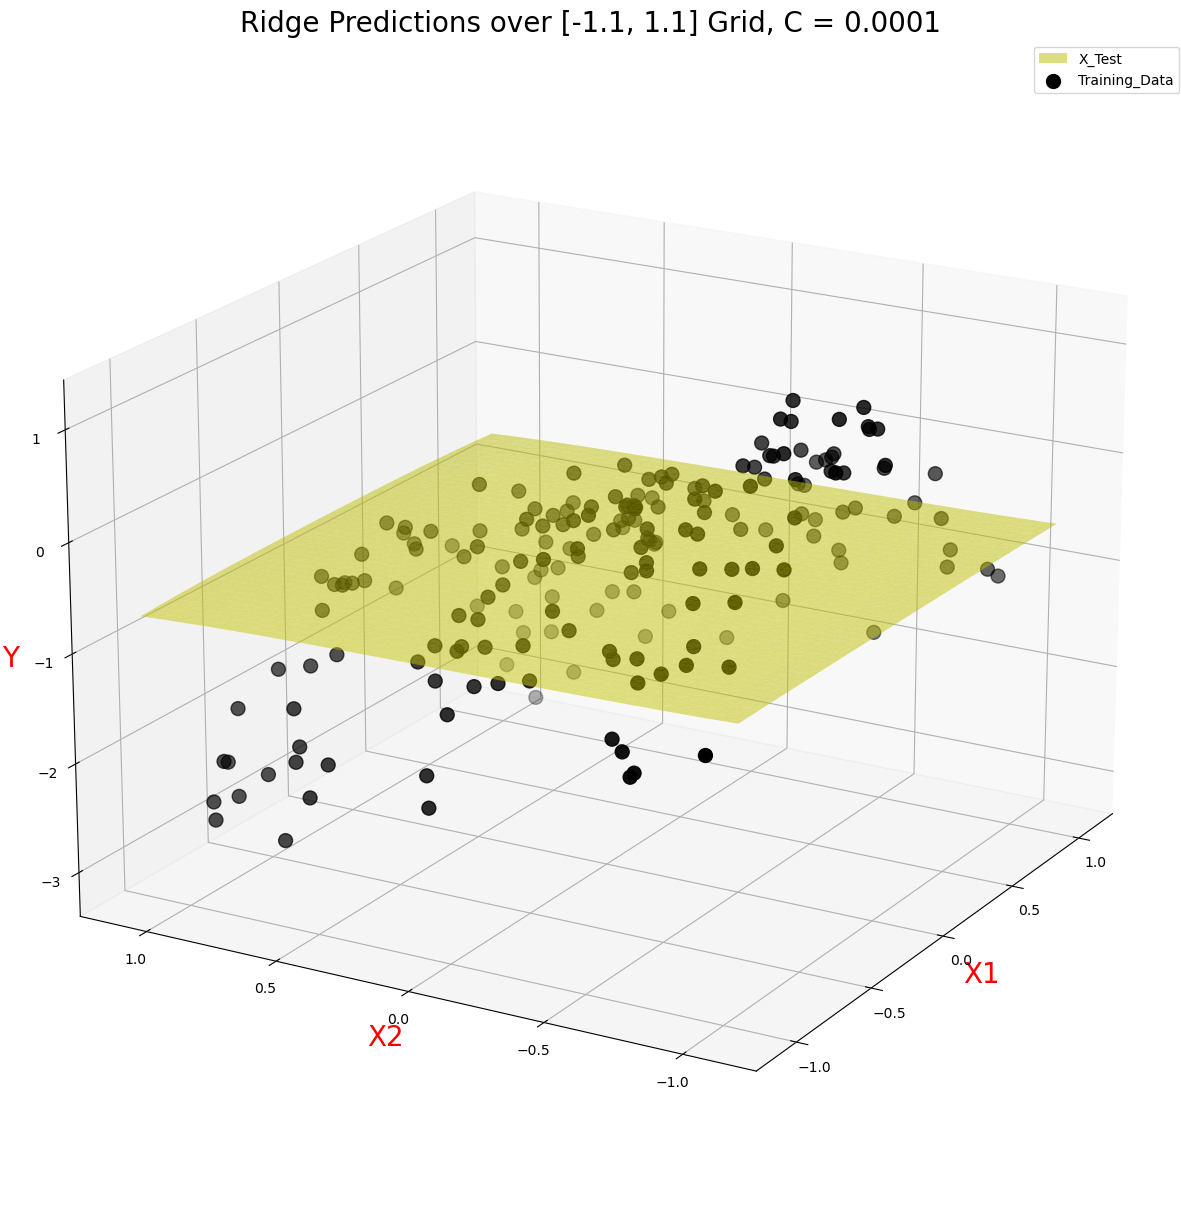

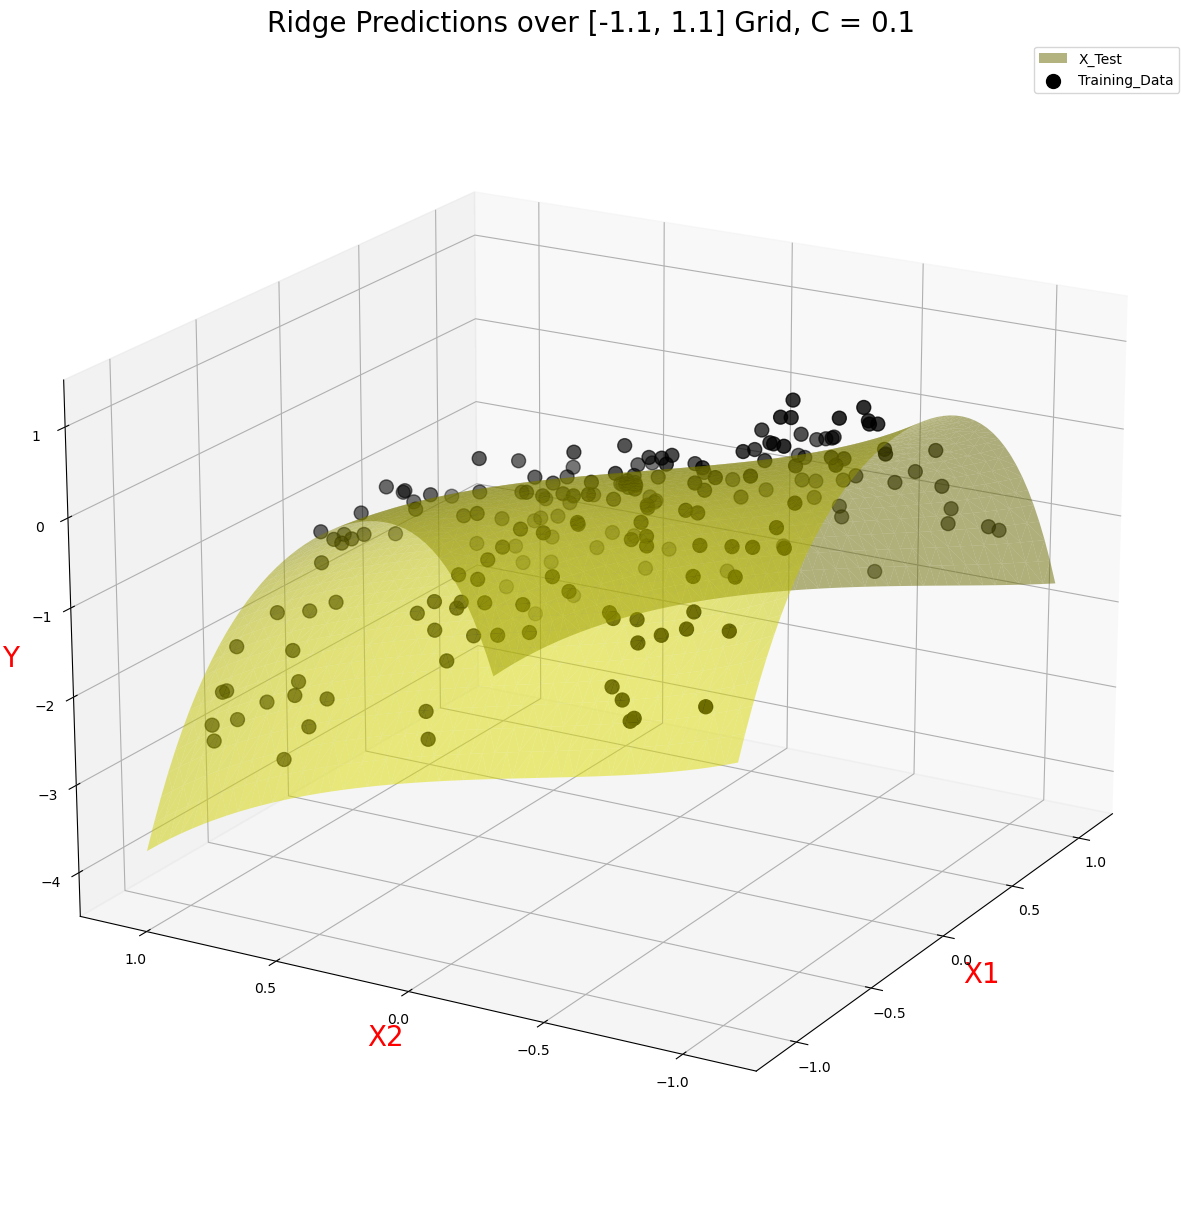

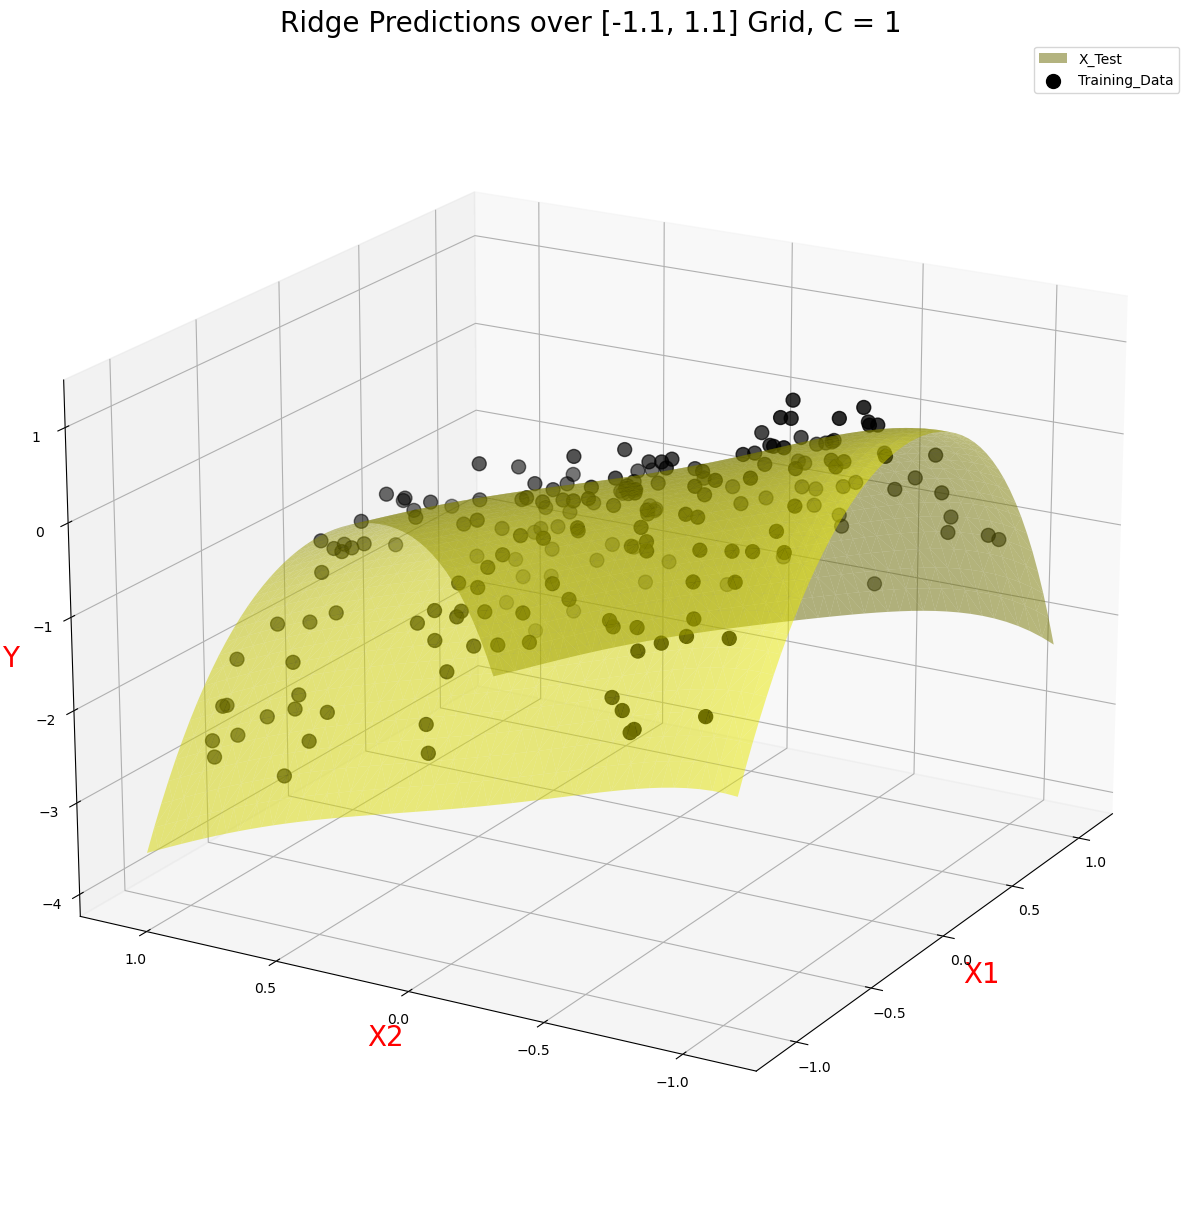

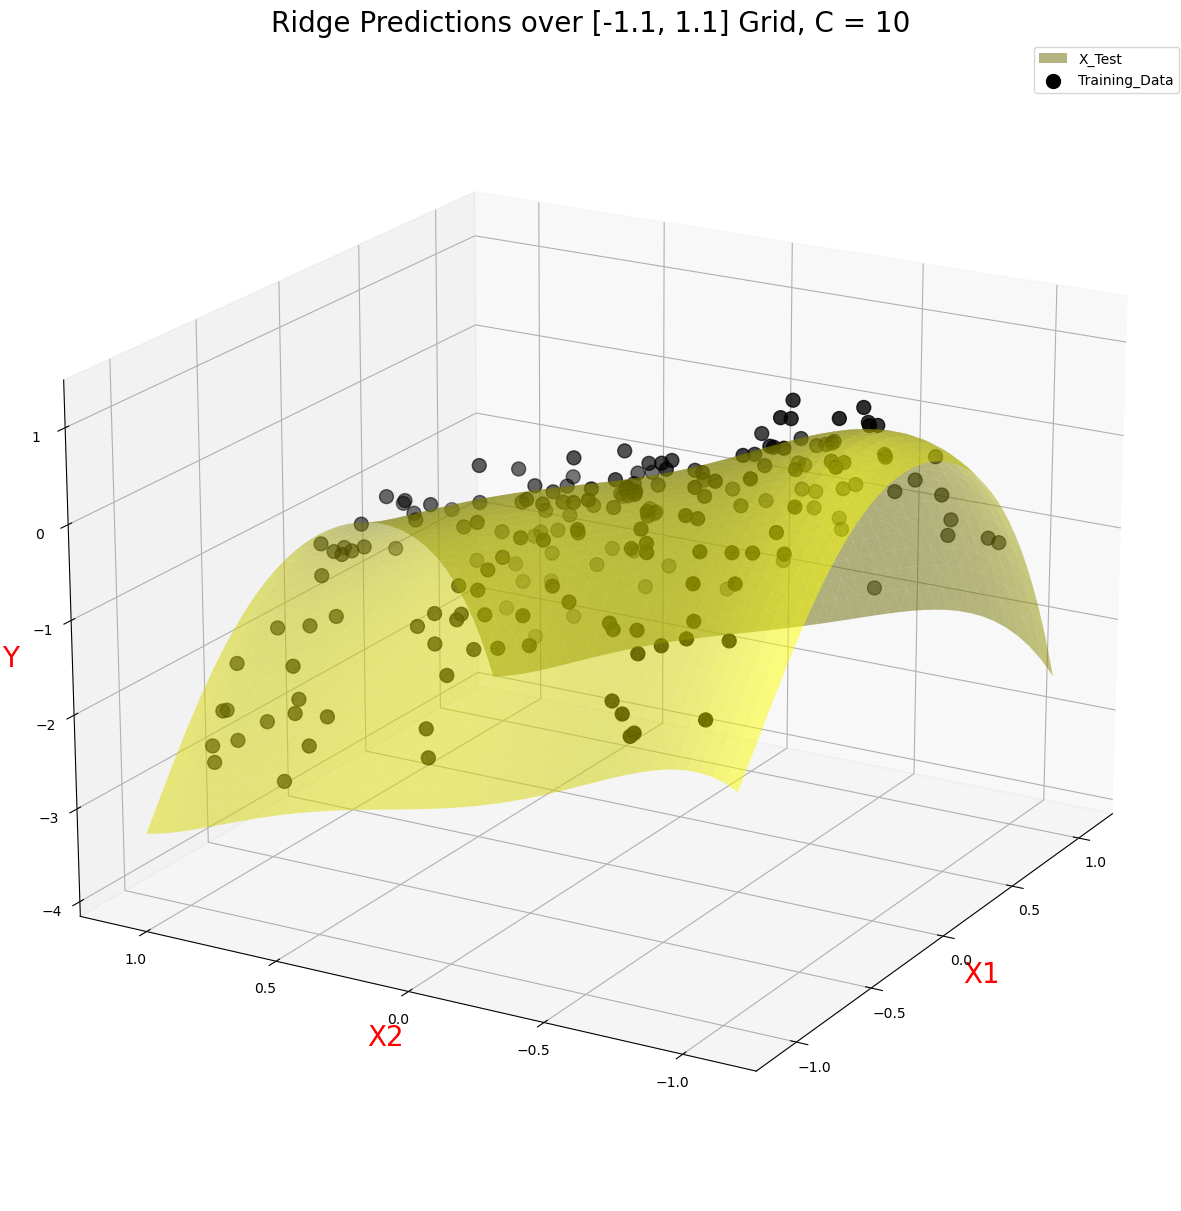

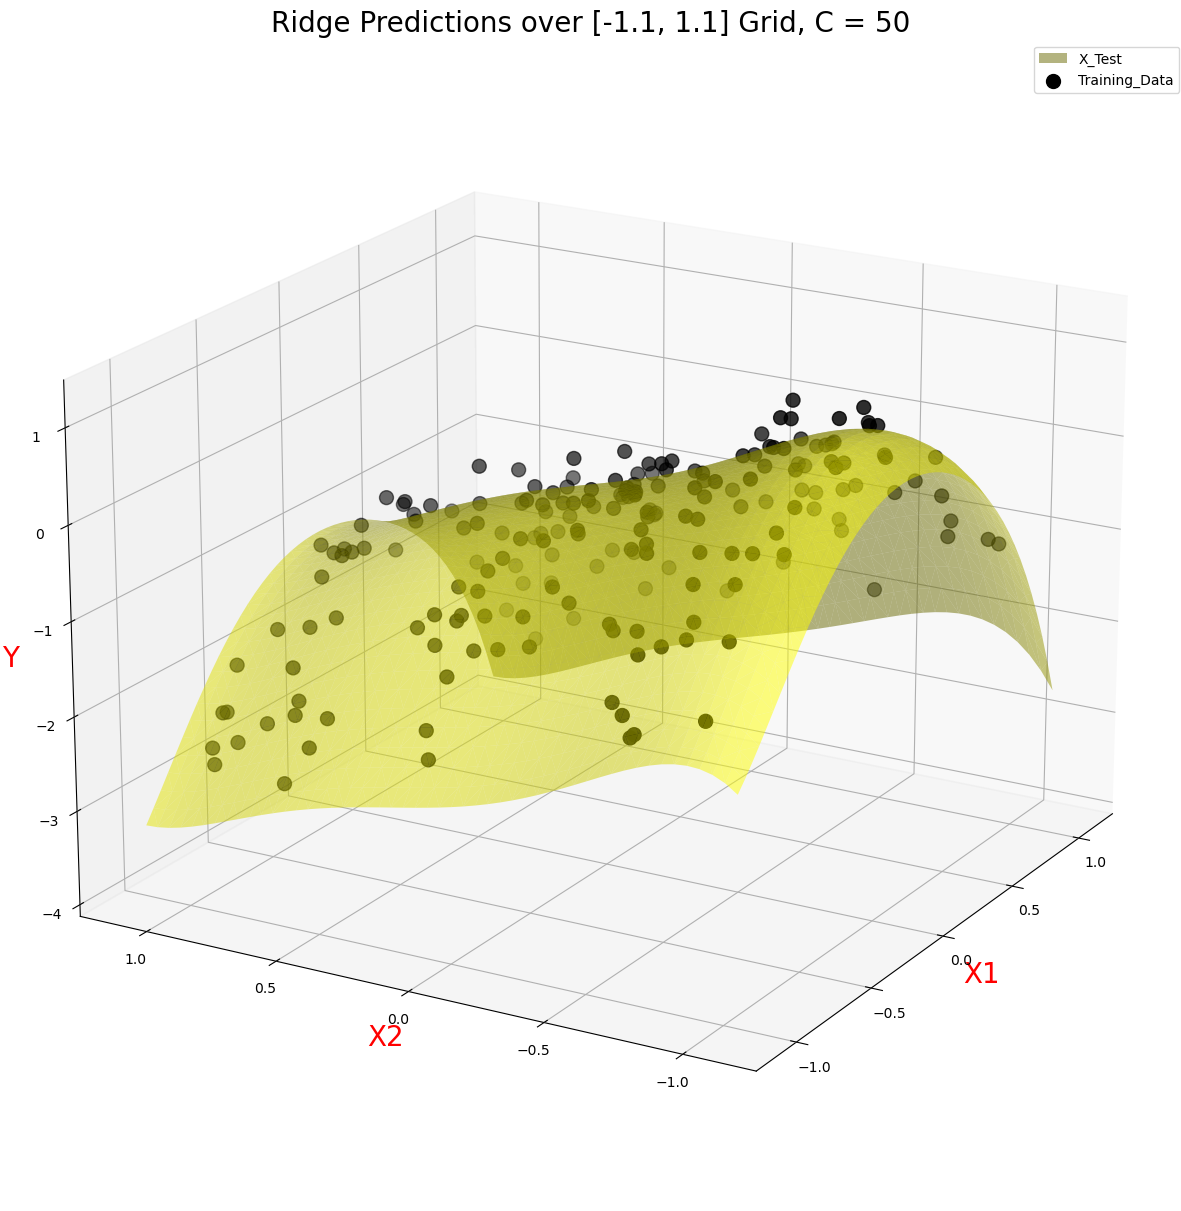

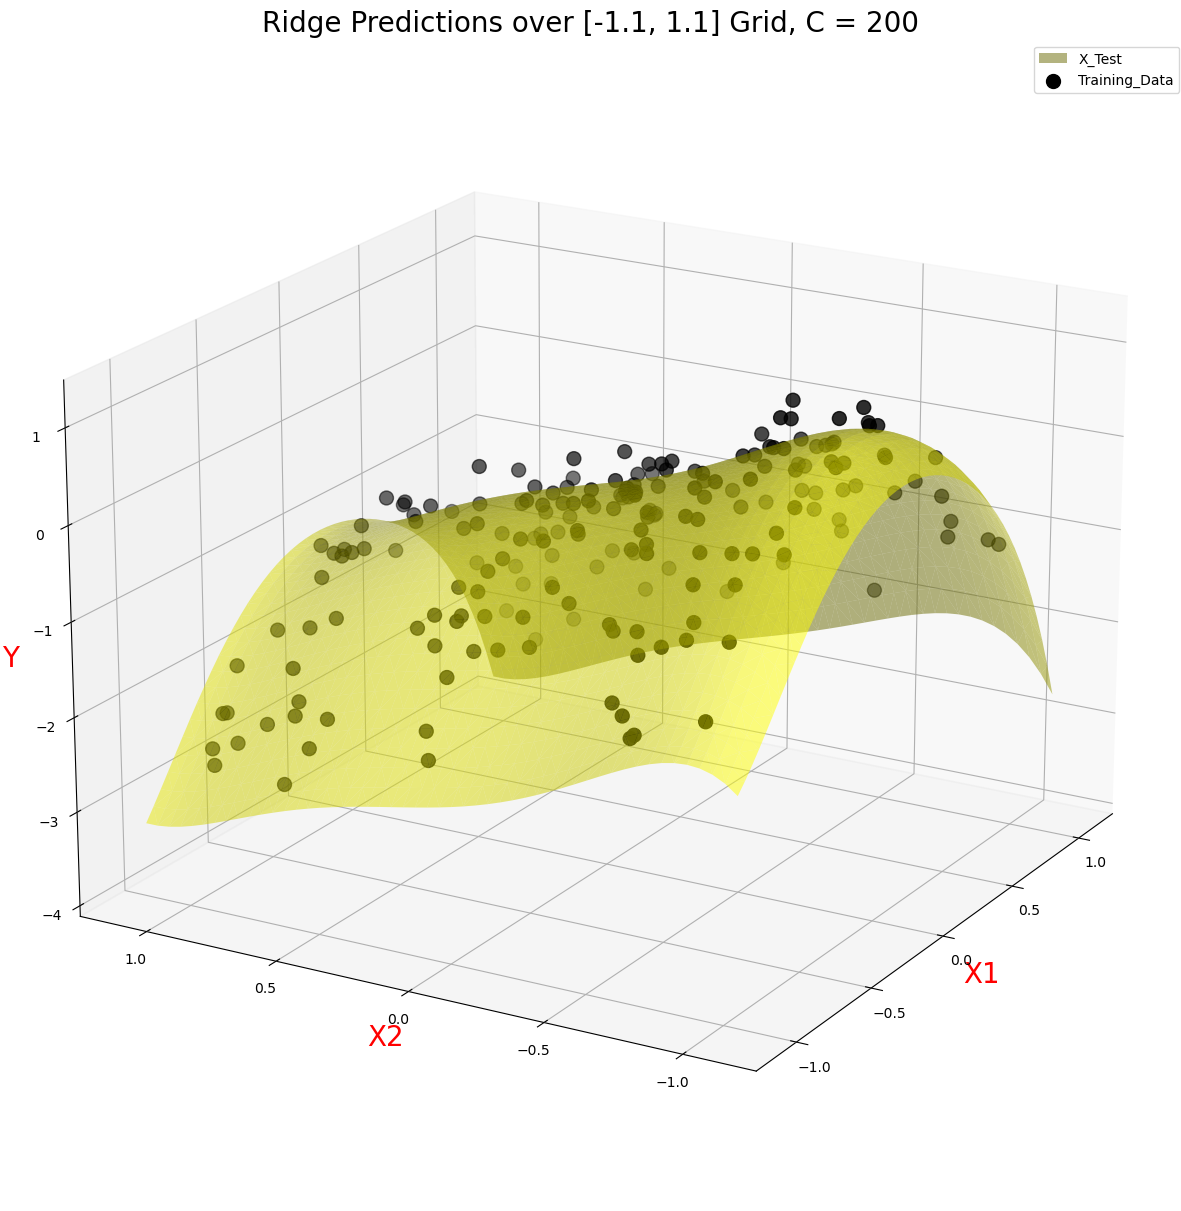

In [7]:
#i(E)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

C=[0.0001, 0.1, 1, 10, 50, 200]

for C_Value in C:
    alpha_val=1/(2*C_Value)
    linridge=Ridge(alpha=alpha_val,max_iter=10000).fit(X_poly,y) #Training Ridge Regression on Poly Features with C value in the above range.
    print("C_Value:", C_Value,"Alpha_val: ",alpha_val,"Ridge Coefficients: ",linridge.coef_,"Intercept: ",linridge.intercept_)
    print()
    print("R squared", linridge.score(X_poly,y))
    print()
    
    ypred=linridge.predict(Xtest_poly)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.set_size_inches(12,12)
    ax1=ax.plot_trisurf(Xtest[:, 0], Xtest[:, 1], ypred, color="yellow", alpha=0.5,label='X_Test') #Plot for Test Data
    ax.scatter(X[:, 0], X[:, 1], y,color='black',label="Training_Data",s=100)#Plot for the Training Data
    ax1._edgecolors2d = ax1._edgecolor3d
    ax1._facecolors2d = ax1._facecolor3d
    ax.set_xlabel('X1',size='20',color='red')
    ax.set_ylabel('X2',size='20',color='red')
    ax.set_zlabel('Y',size='20',color='red')
    ax.view_init(20,210)
    ax.legend()
    ax.set_title("Ridge Predictions over [-1.1, 1.1] Grid, C = " + str(C_Value),fontsize=20)
    

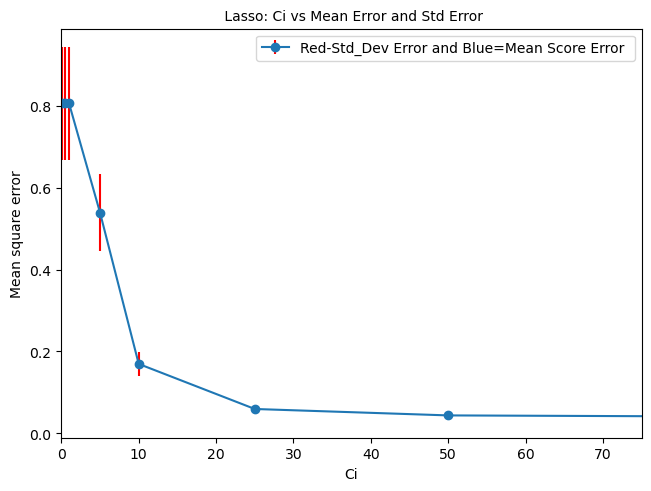

Mean= [0.8054340300183614, 0.8054340300183614, 0.8054340300183614, 0.5389051716751627, 0.16961134779298043, 0.059650251905207854, 0.043979774006332836, 0.040188941201302286]
Std_Error= [0.1373060452206968, 0.1373060452206968, 0.1373060452206968, 0.0933625804338741, 0.029989855220849595, 0.006817673700891519, 0.004930095762668943, 0.005509454661490701]


In [18]:
#ii.a,b
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
mean_error=[]; std_error=[]
Ci_range = [0.1, 0.5, 1, 5, 10,25, 50, 100]
for Ci in Ci_range:

    model = Lasso(alpha=1/(Ci)) #Defining the model with the C values above.
    temp=[]

    kf = KFold(n_splits=5)
    for train, test in kf.split(X_poly):
        model.fit(X_poly[train], y[train]) #Training the Lasso Model with 5 fold Crossvalidation
        ypred = model.predict(X_poly[test])

        temp.append(mean_squared_error(y[test],ypred)) #Calculating Mean Squared Error
    mean_error.append(np.array(temp).mean()) #Calculating the mean of MSE
    std_error.append(np.array(temp).std()) #Calculating the Standard Deviation of MSE
import matplotlib.pyplot as plt
plt.errorbar((Ci_range),mean_error,yerr=std_error,ecolor='red',fmt='-o') #Plotting the Error Bar
plt.xlabel('Ci'); plt.ylabel('Mean square error')
plt.legend(["Red-Std_Dev Error and Blue=Mean Score Error "],loc=1,fontsize=10)
plt.title(" Lasso: Ci vs Mean Error and Std Error", fontsize=10)
plt.xlim((0,75))
plt.show()
print("Mean=",mean_error)
print("Std_Error=",std_error)

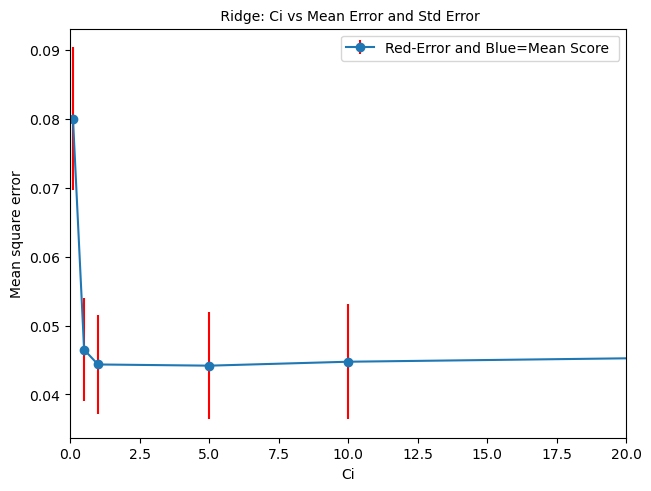

Mean= []
Std_Error= []


In [17]:
#ii.c
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
mean_error_R=[]; std_error_R=[]
Ci_range = [0.1, 0.5, 1, 5, 10,25, 50, 100]
for Ci in Ci_range:

    model = Ridge(alpha=1/(Ci))#Defining the model with the C values above.
    temp=[]

    kf = KFold(n_splits=5)
    for train, test in kf.split(X_poly):
        model.fit(X_poly[train], y[train])#Training the Lasso Model with 5 fold Crossvalidation
        ypred = model.predict(X_poly[test])

        temp.append(mean_squared_error(y[test],ypred))#Calculating Mean Squared Error
    mean_error_R.append(np.array(temp).mean())#Calculating the mean of MSE
    std_error_R.append(np.array(temp).std())#Calculating the Standard Deviation of MSE
import matplotlib.pyplot as plt
plt.errorbar(Ci_range,mean_error_R,yerr=std_error_R,ecolor='red',fmt='-o')#Plotting the Error Bar
plt.xlabel('Ci'); plt.ylabel('Mean square error')
plt.legend(["Red-Error and Blue=Mean Score "],loc=1)
plt.title(" Ridge: Ci vs Mean Error and Std Error", fontsize=10)
plt.xlim((0,20))
plt.show()
print("Mean=",mean_error)
print("Std_Error=",std_error)

In [20]:
#Dummy Regressor
from sklearn.dummy import DummyRegressor
%matplotlib inline
kf = KFold(n_splits = 5)
mean_error1=[]; std_error1=[];

#Loop through each k fold
for Ci in Ci_range:
    mse_temp1=[]
        #Model

    model1=DummyRegressor(strategy="mean")
                
    for train, test in kf.split(X_poly):
        model1.fit(X_poly[train],y[train])
        ypred2 = model1.predict(X_poly[test])
        mse1= mean_squared_error(y[test],ypred2)
        mse_temp1.append(mse1)
        #Get mean & std
    mean_error1.append(np.array(mse_temp1).mean())
    std_error1.append(np.array(mse_temp1).std())
        


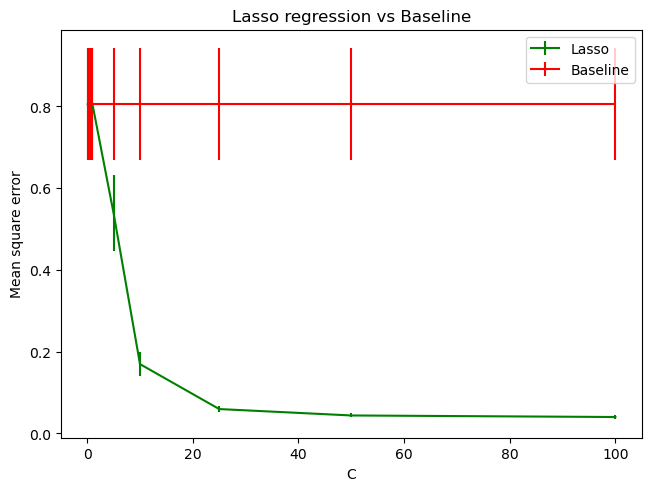

Baseline Mean Error= [0.8054340300183614, 0.8054340300183614, 0.8054340300183614, 0.8054340300183614, 0.8054340300183614, 0.8054340300183614, 0.8054340300183614, 0.8054340300183614]
Lasso Mean Error= [0.8054340300183614, 0.8054340300183614, 0.8054340300183614, 0.5389051716751627, 0.16961134779298043, 0.059650251905207854, 0.043979774006332836, 0.040188941201302286]


In [23]:
    #Plot Lasso vs Baseline
plt.errorbar((Ci_range),mean_error,yerr=std_error, color ='green',label='Lasso')
plt.errorbar(Ci_range, mean_error1, yerr=std_error1, color ='red',label='Baseline')
plt.xlabel('C')
plt.ylabel('Mean square error')
plt.title('Lasso regression vs Baseline')
plt.legend()
plt.show()
print("Baseline Mean Error=",mean_error1)
print("Lasso Mean Error=",mean_error)

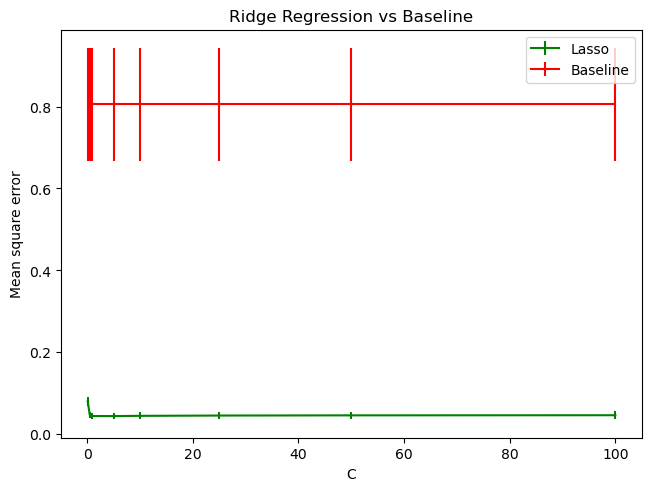

Baseline Mean Error= [0.8054340300183614, 0.8054340300183614, 0.8054340300183614, 0.8054340300183614, 0.8054340300183614, 0.8054340300183614, 0.8054340300183614, 0.8054340300183614]
Ridge Mean Error= [0.08002735506248294, 0.046505135775350044, 0.044360056728321294, 0.04418593133367131, 0.04475709118530048, 0.04549987484750961, 0.04595160705191762, 0.046276253251247686]


In [24]:
    #Plot Ridge vs Baseline
plt.errorbar((Ci_range),mean_error_R,yerr=std_error_R, color ='green',label='Lasso')
plt.errorbar(Ci_range, mean_error1, yerr=std_error1, color ='red',label='Baseline')
plt.xlabel('C')
plt.ylabel('Mean square error')
plt.title('Ridge Regression vs Baseline')
plt.legend()
plt.show()
print("Baseline Mean Error=",mean_error1)
print("Ridge Mean Error=",mean_error_R)